In [ ]:
Susanah#Draw multiple graphs together showing a random set of 3 pokemons height, weight, and number of games that they have been in
#This data should be presented as a single set of data (instead of 3 independent graphs)
#The graph should be labeled and titled appropriately.
#This should be submitted as a single file named `main.py`

In [79]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

p = pd.read_csv('pokemon.csv')
print(p)

      pokemon_id            identifier  species_id  height  weight  \
0              1             bulbasaur           1       7      69   
1              2               ivysaur           2      10     130   
2              3              venusaur           3      20    1000   
3              4            charmander           4       6      85   
4              5            charmeleon           5      11     190   
...          ...                   ...         ...     ...     ...   
1087       10190   eternatus-eternamax         890    1000       0   
1088       10191  urshifu-rapid-strike         892      19    1050   
1089       10192           zarude-dada         893      18     700   
1090       10193           calyrex-ice         898      24    8091   
1091       10194        calyrex-shadow         898      24     536   

      base_experience  order  is_default  
0                  64      1           1  
1                 142      2           1  
2                 263      3  

In [17]:
p.head(10)

,id,identifier,species_id,height,weight,base_experience,order,is_default
0,1,bulbasaur,1,7,69,64,1,1
1,2,ivysaur,2,10,130,142,2,1
2,3,venusaur,3,20,1000,263,3,1
3,4,charmander,4,6,85,62,5,1
4,5,charmeleon,5,11,190,142,6,1
5,6,charizard,6,17,905,267,7,1
6,7,squirtle,7,5,90,63,10,1
7,8,wartortle,8,10,225,142,11,1
8,9,blastoise,9,16,855,265,12,1
9,10,caterpie,10,3,29,39,14,1


In [18]:
g = pd.read_csv('poke_by_game.csv')
g.head(10)

,pokemon_id,version_id,game_index
0,1,1,153
1,1,2,153
2,1,3,153
3,1,4,1
4,1,5,1
5,1,6,1
6,1,7,1
7,1,8,1
8,1,9,1
9,1,10,1


In [150]:
game_index_column = g['game_index']
p['game_index'] = game_index_column
#took game_index from 'poke_by_game' and put it in 'pokemon'

In [151]:
print(p)

      pokemon_id            identifier  species_id  height  weight  \
0              1             bulbasaur           1       7      69   
1              2               ivysaur           2      10     130   
2              3              venusaur           3      20    1000   
3              4            charmander           4       6      85   
4              5            charmeleon           5      11     190   
...          ...                   ...         ...     ...     ...   
1087       10190   eternatus-eternamax         890    1000       0   
1088       10191  urshifu-rapid-strike         892      19    1050   
1089       10192           zarude-dada         893      18     700   
1090       10193           calyrex-ice         898      24    8091   
1091       10194        calyrex-shadow         898      24     536   

      base_experience  order  is_default  game_index  
0                  64      1           1         153  
1                 142      2           1         

In [391]:
column_indices_to_drop = [0,2,5,6,7]

# Dropped the columns based on indices from 'p' (pokemon)
x = p.drop(p.columns[column_indices_to_drop], axis=1)

print(x)

                identifier  height  weight  game_index
0                bulbasaur       7      69         153
1                  ivysaur      10     130         153
2                 venusaur      20    1000         153
3               charmander       6      85           1
4               charmeleon      11     190           1
...                    ...     ...     ...         ...
1087   eternatus-eternamax    1000       0          55
1088  urshifu-rapid-strike      19    1050          55
1089           zarude-dada      18     700          55
1090           calyrex-ice      24    8091          55
1091        calyrex-shadow      24     536          55

[1092 rows x 4 columns]


In [519]:
random_rows = x.sample(3)
print(random_rows)
#tiny little dataframe with everything I need. Just wish I could make the graph update with the 
#random selections

      identifier  height  weight  game_index
560     sigilyph      14     140          15
878   copperajah      30    6500          44
937  pinsir-mega      17     590          47


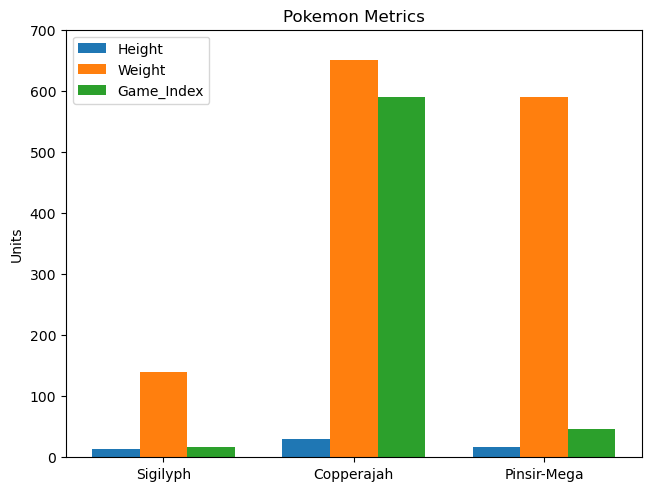

In [521]:
#I went with matplotlib for this. Seaborn is still new to me so chose  
#boring and technical over pretty and flashy. Also, cluster charts are not easy in seaborn
#The biggest regret here is not being able to instantaneously update this graph with each update of 
#random selection (3 poke and their height, weight, game index) i am sure there's a way to do it
#but it's late and I need to send this now for grading.

import matplotlib.pyplot as plt
import numpy as np

pokemon = ('Sigilyph', 'Copperajah','Pinsir-Mega')
poke_stats = {
    'Height': (14,30,17),
    'Weight': (140,650,590),
    'Game_Index': (17,590,47)
}

x = np.arange(len(pokemon)) 
width = 0.25  # the width of the bars
multiplier = 0 #prevents bars from stacking


fig, ax = plt.subplots(layout='constrained')
#my subplots follow the same axes, keeping the layout nice and tight looks best

for attribute, measurement in poke_stats.items():
    offset = width * multiplier #side by side, gets rid of overlaps
    ax.set_xticks(x + width, pokemon)
    rects = ax.bar(x + offset, measurement, width, label=attribute) #position of the bars from 
    #df 'x', alongside all the other things needed for appropriate cluster bar graphs
    multiplier += 1 #keeps each subsequent bar cluster from stacking

#I couldn't think of a good way to measure all of these things fairly...Units seemed most logical
#But now of course it doesn't look great
ax.set_ylabel('Units')
ax.set_title('Pokemon Metrics')
ax.legend(loc='upper left')
ax.set_ylim(0, 700)

plt.show()